In [5]:
!pip install matplotlib seaborn

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
vaccination_data = pd.read_csv("country_vaccinations.csv")
covid_data = pd.read_csv("Covid Data.csv")

# Clean and process data
# Convert date columns to datetime for better handling
vaccination_data['date'] = pd.to_datetime(vaccination_data['date'], errors='coerce')
covid_data['DATE_DIED'] = pd.to_datetime(covid_data['DATE_DIED'], errors='coerce')


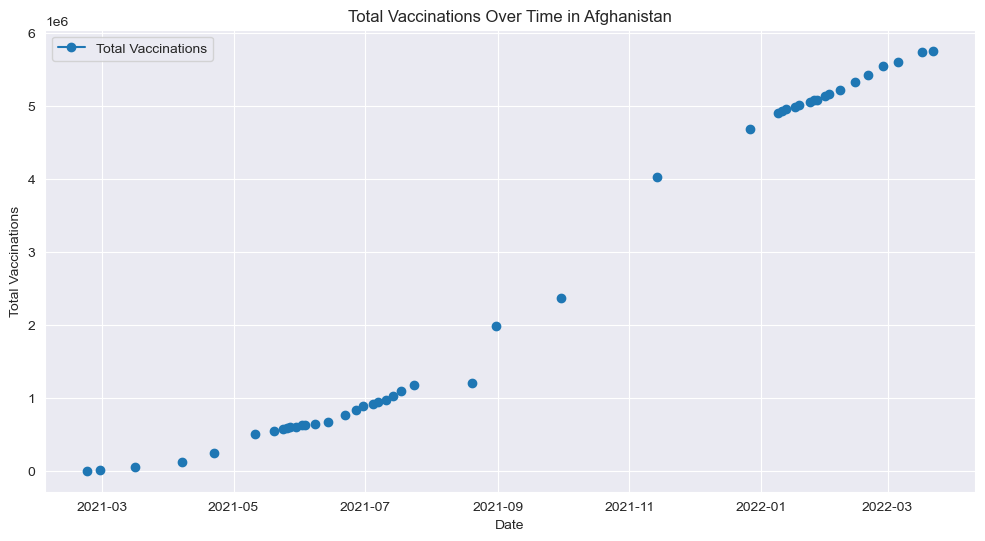

In [7]:
# Visualize total vaccinations over time for a single country (Afghanistan as an example)
afghanistan_vaccination = vaccination_data[vaccination_data['country'] == 'Afghanistan']

plt.figure(figsize=(12, 6))
plt.plot(afghanistan_vaccination['date'], afghanistan_vaccination['total_vaccinations'], marker='o', label='Total Vaccinations')
plt.title("Total Vaccinations Over Time in Afghanistan")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Distribution of age in COVID data
plt.figure(figsize=(10, 6))
sns.histplot(covid_data['AGE'], bins=20, kde=True, color='blue')
plt.title("Distribution of Age in COVID Data")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [ ]:

# ICU admissions vs Non-ICU in COVID data
icu_data = covid_data['ICU'].value_counts()
plt.figure(figsize=(8, 6))
icu_data.plot(kind='bar', color=['skyblue', 'orange'], alpha=0.8)
plt.title("ICU Admissions in COVID Data")
plt.xlabel("ICU (1=Yes, 97/2=No)")
plt.ylabel("Count")
plt.show()

In [ ]:
# daily vaccinations trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=vaccination_data, x='date', y='daily_vaccinations', hue='country', legend=False, alpha=0.5)
plt.title("Daily Vaccinations Trend (All Countries)")
plt.xlabel("Date")
plt.ylabel("Daily Vaccinations")
plt.grid(True)
plt.show()

In [11]:
import numpy as np

vaccination_numerical = vaccination_data.select_dtypes(include=np.number)
covid_numerical = covid_data.select_dtypes(include=np.number)

In [12]:
# Calculate mean and standard deviation for vaccination data
vaccination_stats = vaccination_numerical.describe().loc[['mean', 'std']]
print("Vaccination Data - Mean and Standard Deviation:")
print(vaccination_stats)

Vaccination Data - Mean and Standard Deviation:
      total_vaccinations  people_vaccinated  people_fully_vaccinated  \
mean        4.592964e+07       1.770508e+07             1.413830e+07   
std         2.246004e+08       7.078731e+07             5.713920e+07   

      daily_vaccinations_raw  daily_vaccinations  \
mean            2.705996e+05       131305.486075   
std             1.212427e+06       768238.773293   

      total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
mean                       80.188543                      40.927317   
std                        67.913577                      29.290759   

      people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  
mean                            35.523243                     3257.049157  
std                             28.376252                     3934.312440  


In [13]:
# Calculate mean and standard deviation for COVID data
covid_stats = covid_numerical.describe().loc[['mean', 'std']]
print("\nCOVID Data - Mean and Standard Deviation:")
print(covid_stats)


COVID Data - Mean and Standard Deviation:
         USMER  MEDICAL_UNIT       SEX  PATIENT_TYPE    INTUBED  PNEUMONIA  \
mean  1.632194      8.980565  1.499259      1.190765  79.522875   3.346831   
std   0.482208      3.723278  0.500000      0.392904  36.868886  11.912881   

            AGE   PREGNANT  DIABETES      COPD    ASTHMA   INMSUPR  \
mean  41.794102  49.765585  2.186404  2.260569  2.242626  2.298132   
std   16.907389  47.510733  5.424242  5.132258  5.114089  5.462843   

      HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR   OBESITY  RENAL_CHRONIC  \
mean      2.128989       2.435143         2.26181  2.125176       2.257180   
std       5.236397       6.646676         5.19485  5.175445       5.135354   

       TOBACCO  CLASIFFICATION_FINAL        ICU  
mean  2.214333              5.305653  79.553974  
std   5.323097              1.881165  36.823073  


In [14]:
# Calculate correlations for numerical data
vaccination_corr = vaccination_numerical.corr()
covid_corr = covid_numerical.corr()

print("\nVaccination Data - Correlation Matrix:")
print(vaccination_corr)

print("\nCOVID Data - Correlation Matrix:")
print(covid_corr)


Vaccination Data - Correlation Matrix:
                                     total_vaccinations  people_vaccinated  \
total_vaccinations                             1.000000           0.983438   
people_vaccinated                              0.983438           1.000000   
people_fully_vaccinated                        0.989681           0.957599   
daily_vaccinations_raw                         0.654712           0.755540   
daily_vaccinations                             0.688502           0.833433   
total_vaccinations_per_hundred                 0.172297           0.123938   
people_vaccinated_per_hundred                  0.184649           0.157775   
people_fully_vaccinated_per_hundred            0.142252           0.101717   
daily_vaccinations_per_million                 0.038298           0.028720   

                                     people_fully_vaccinated  \
total_vaccinations                                  0.989681   
people_vaccinated                                  